# Gradient Descent for Image denosising

# **Part 1: gradient descent**

**Intro**

For this first exercise we will aply the gradient descent algorithm to find the minimum of a function. In our case we define a function an name it as toy function.

## **1. Gradient descent**

In [7]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from IPython import display

### **1. Complete the MatLab functions toy_fun and toy_gradient. These functions implement the function f and its gradient.**

**toy_fun**

\begin{equation}
f(x_1,x_2) = \frac1{1000}\left(x_1^4 + x_2^4 - 80 x_1^2 - 60 x_2^2 + 100x_1 +
50 x_2 + 1\right)
\end{equation}

In [8]:
def toy_fun(x: np.matrix):
    """
    Polynomial toy function - see the guide
    
    :param x: 2x1 vector 
    
    :return y: value of the function at point x
    """
    # TODO: Compute the function
    return (x[0]**(4) + x[1]**(4) - (80*x[0]**2) - (60*x[1]**2) + (100*x[0]) + (50*x[0]) + 1)/1000

We just defined x1 as x[0] and x2 as x[1] and computed the formula.

**toy_gradient**

We know that:

$$\nabla f(x_{1},x_{2}) =
\begin{bmatrix}
\dfrac{\partial f(x_{1},x_{2})}{\partial x_{1}}\\
\\
\dfrac{\partial f(x_{1},x_{2})}{\partial x_{2}}
\\
\end{bmatrix} =
\begin{bmatrix}
\frac1{1000}\left(4x_1^3 - 160 x_1 + 100\right)\\
\\
\frac1{1000}\left(4x_2^3 - 120 x_2 + 50\right)
\\
\end{bmatrix}$$

In [9]:
def toy_gradient(x: np.matrix):
    """
    Gradient of toy_fun polynomial toy function 
    
    :param x: 2x1 matrix 
    :return grad: 2x1 matrix: gradient of the toy function at point x
    """
    # TODO: Compute the gradient of the toy function (must be calculated by hand)
    return np.matrix([ [(4*x[0,0]**(3))-(160*x[0,0])+100],
                     [(4*x[1,0]**(3))-(120*x[1,0])+50]])/1000

We computed the formula of the gradient, which are the first parital derivativees of each variable.

### **2. Complete the MatLab function gradient_descent. This function implements a gradient descent algorithm. We are going to implement it in a way in which we can use the same gradient descent function for this toy example and for the denoising energy of the next section. Follow the comments provided in the code.**

In [10]:
def gradient_descent(callback,
                     callback_params: dict, 
                     initial_condition: np.matrix, 
                     step_size: float,
                     max_iterations: int,
                     tolerance: float,
                     fig = None,
                     ax = None):
    """
    Implementation of the gradient descent algorithm with
    fixed step size. It uses function handles (handles are MatLab pointers). It
    can work with any function and gradient if they are implemented with . Here params
    is a structure with the internal parameters of my_fun and my_grad.

    :param callback: function to be optimized
    :param callback_params: a structure with the internal parameters of the target function and 
                            its gradient.
    :param initial_condition: initial condition for gradient descent
    :param step_size: size of the gradient descent steps
    :param max_iterations: maximum number of iterations
    :param tolerance: tolerance for the stopping condition (it stop when 
                      the norm of the gradient is below the tolerance)

    :return current_value: value found
    """
    # Initialize variables
    current_value = initial_condition
    previous_value = current_value
    current_iteration = 0
    current_norm_value = np.inf
    
    #fn_k=[]DESCOMENT1/4
    #fn_k.append(toy_fun(current_value.A))#collects value of functionDESCOMENT2/4
    # Main loop for Gradient Descent
    while (current_norm_value > tolerance) and (current_iteration < max_iterations):
        # Keep previous - just for visualization
        previous_value = current_value

        # TODO: Run the gradient descent
        gf= callback(current_value,**callback_params) #get the gradient of the function
        
        # TODO: Update the current value and norm value
        current_value=current_value-step_size * gf #update value in the direction of the steepest descent
        current_norm_value = np.linalg.norm(gf)#norm of gradient
        
        #fn_k.append(toy_fun(current_value.A))#we append the current value to fn_k(.A is a call to itself)DESCOMENT3/4
        
        print("{} of {} -> tolerance: {}".format(current_iteration, max_iterations, current_norm_value))
        
        # Plot current position! Just for visualization purposes 
        # if x is a 2x1 vector (visualization of toy example) 
        if (current_value.shape[0] == 2) & (current_value.shape[1] == 1):
            if not ax:
                fig, ax = plt.subplots()
            ax.plot(current_value[0, 0], current_value[1, 0], marker = 'o', color = "k")
            ax.plot([previous_value[0, 0], current_value[0, 0]], 
                    [previous_value[1, 0], current_value[1, 0]], "-k")
            display.clear_output(wait=True)
            display.display(fig)            

        # Update the iteration
        current_iteration += 1
        
    return current_value#,fn_kDESCOMENT4/4

Given the conditions explained in the red part, this function allow us to compute the gradient descent of a function.
**You can see that fn which stores the position at each iteration is commented. This is because if not the part of denoising image gives errors, you can descomment it to see later the part of the logarithmic error.**

### **3 Run the following block and answer the questions on the PDF**

In [11]:
def toy_main():
    # Set the grids
    x1 = np.arange(-10, 10, 0.1)
    x2 = np.arange(-10, 10, 0.1)

    # Evaluate the toy_fun
    y = np.zeros(shape = (len(x1), len(x2)))
    for i, x1_value in enumerate(x1):
        for j, x2_value in enumerate(x2):
            y[i, j] = toy_fun([x1_value, x2_value])

    # Plot the surface.
    fig = plt.figure(figsize = (14, 8))
    ax = fig.gca(projection='3d')
    X, Y = np.meshgrid(x1, x2)
    Z = y
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)

    # Show the surface
    #plt.show()

    # Plot the contours
    fig_contours, ax_contours = plt.subplots(figsize = (10, 8))
    CS = ax_contours.contour(X, Y, Z, 
                    corner_mask = False, levels = 150, 
                    linewidths=(1,), cmap = cm.coolwarm)
    plt.close()
    
    # Set initial condition --> TRY CHANGING IT
    x0 = np.matrix([[5], [-5]])
    #x0 = np.matrix([[-2], [-8]])
    # Set gradient descent parameters --> EXPLORE USING DIFFERENT PARAMETERS
    step_size=1
    tolerance = 0.01
    max_iterations = 100

    # Call gradient descent minimization
    print("First gradient descent ...")
    
    xs_1 = gradient_descent(callback = toy_gradient,
                            callback_params = {}, 
                            initial_condition = x0, 
                            step_size = step_size,
                            max_iterations = max_iterations,
                            tolerance = tolerance,
                            fig = fig_contours,
                            ax = ax_contours)       
    
    return xs_1

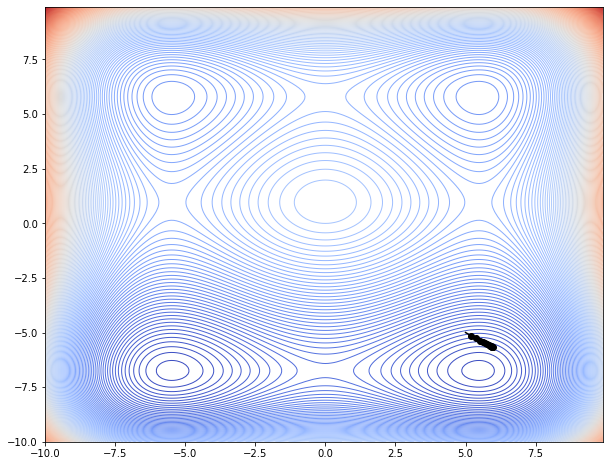

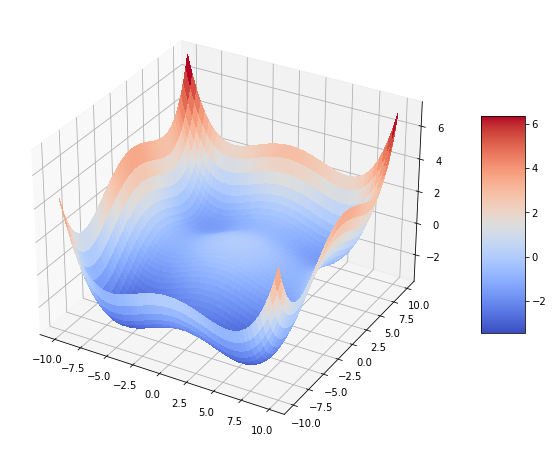

In [12]:
xs_1= toy_main()

As you can see, the function toy_main prepares the parameters for doing the gradient descent and makes use of very useful tool to visualize the behaviour of the algorithm, which allow to make some observations for each parameter:

-Initial point: it is just the point in which you will start,

-Step size: A big step size makes the algorithm to diverge and in most cases stop at the maxnumber of iterations while a very small step size(i.e. 0.01) converges to a minimum but it does it too slowly. The step size depends more on the precision you want and the resources you want to spend while computing the function, and also in the type of function that you think it could be.

-Tolerance: if the norm of the gradient is below it, the algorithm will stop. Chosing very high values it stops at the first iterations but very low values are vey unlikely to stop the algorithm. The value given by default (0.01) seems a good option.

-Max iterations: Again, there is no an optimal election but either the algorithm diverges(big step) or converge very slow (maybe at every iteration it is falling very near to the minimum but not suficient to stop it) the use of a limit is very useful to prevent "more useless" computations.


#### ·How many local minima does the function have in the domain [-10, 10]* [-10, 10]?
There are four, you can easy identify them in the plot. They are the ones in darker blue.

####  ·Run the gradient descent starting from x0 = [-2,-8]. Does it converge to the global minimum?
Yes, maybe it doesn't end exactly at the minimum but there is a clear converge towords one of this four minimums.

#### ·Estimate the rate of convergence from the logarithmic plot.
Although there coul appear some unexpected desviations, in general the trend is negative and linear, therofore according to the theory it has linear convergence and the slope should be around log(r), where r is the rate.

#### ·Try different step sizes. Which step sizes yield a faster convergence? Which are more accurate?
Steps between (1-5) usually converge with 2 or 3 iterations but they are unaccurate. To increase it the step size should be smaller: as small it is the accuracy increases, but the needed iterations to.

Text(0.5, 1.0, 'Logarithmic error(f(x_i)-f*)')

C:\Users\Usuario\anaconda3\lib\site-packages\ipykernel\pylab\backend_inline.py:183: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  for label in axis.get_ticklabels()])


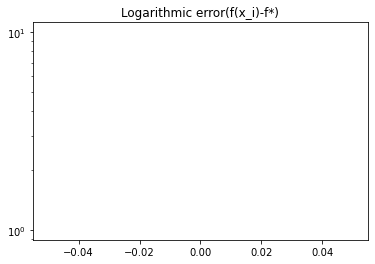

In [13]:
e_k= [np.linalg.norm((xs_1[1][i]-xs_1[1][-1])) for i in range(len(xs_1[1]))]

plt.semilogy(e_k)
plt.title("Logarithmic error(f(x_i)-f*)")

Observe that the error tends to decrease at each iteration in a linear trend for the logarithmic error. **(If you don't see anything is because the comments on f_n in the gradient_descent function)**

## **2. Image denoising energy**

**Intro**

Now we will see an application of the previous algorithm to denoising images. For that, we
will minimize an energy which enforces close-by pixels to have a similar value.

### **1. Complete the functions _im_fwd_gradient_ and _im_bwd_divergence_. These functions compute the forward gradient &nabla;<sup>+</sup> and the backwards divergence div<sup>-</sup>. Follow the comments provided in the code. Avoid building the matrices &nabla;<sup>+</sup> and div<sup>-</sup>**

#### **1.1 im_fwd_gradient**

For matrix $u$, $\nabla^{+}u_{i,j} = (\nabla^{+}_{i}u_{i,j},\nabla^{+}_{j}u_{i,j})$ where:

$$\nabla^{+}_{i}u_{i,j} = \begin{cases}
  u_{i+1,j} - u_{i,j} & \text{if }i<M\\ 
  0& \text{if }i=M
\end{cases}$$

$$\nabla^{+}_{j}u_{i,j} = \begin{cases}
  u_{i,j+1} - u_{i,j} & \text{if }j<N\\ 
  0& \text{if }j=N
\end{cases}
$$


x
[[ 0.4  2.   1. ]
 [ 7.   4.   4. ]
 [17.   9.   0. ]]

g_i:along rows
[[ 6.6  2.   3. ]
 [10.   5.  -4. ]
 [ 0.   0.   0. ]]

g_j:along columns
[[ 1.6 -1.   0. ]
 [-3.   0.   0. ]
 [-8.  -9.   0. ]]


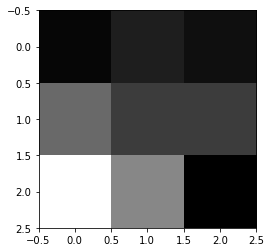

In [14]:
def im_fwd_gradient(image: np.matrix):
    """
    Discrete gradient of an image using forward differences, with homogeneous Neuman boundary conditions.

    :param u: image (MxN)
            
    :return gradu_j: partial derivative in the j (rows) direction (also x direction)
    :return gradu_i: partial derivative in the i (cols) direction (also y direction)
    """
    # TODO: Get the size of the image
    image_shape = image.shape
    
    # TODO: Calculate both gradients
    gradu_j = np.append(np.diff(image, axis=1), np.zeros((image_shape[0],1)),axis=1) #append a M by 1 array of zeros to the column: gradient along the column
    gradu_i = np.append(np.diff(image, axis=0), np.zeros((1,image_shape[1])),axis=0) #append a 1 by N array of zeros to the row: gradient along the row
    return gradu_i, gradu_j


x= np.matrix([[0.4,2,1],[7,4,4],[17,9,0]])
plt.imshow(x, cmap="gray")
g_i, g_j=im_fwd_gradient(x)
print("x\n{}\n\ng_i:along rows\n{}\n\ng_j:along columns\n{}".format(x,g_i, g_j))


As you can check in the example, given a matrix this function computes the gradeient for rows (g_i)and for columns(g_j), appending 0 in the cases described at theory. Ther is also a gray map of each value of the ,atrix x.

#### **1.2 im_bwd_divergence**

For matrix $u$, with $u^{1} = \nabla^{+}_{i}u_{i,j}$ and $u^{2} = \nabla^{+}_{j}u_{i,j}$:

$$(div^{-}\,u) = 
\begin{cases}
  u^{1}_{i,j} - u^{1}_{i-1,j} & \text{if }1< i<M\\ 
  u^{1}_{i,j} & \text{if }i=1\\
  - u^{1}_{i-1,j} & \text{if }i=M
\end{cases}
+
\begin{cases}
  u^{2}_{i,j} - u^{2}_{i,j-1} & \text{if }1< j<N\\ 
  u^{2}_{i,j} & \text{if }j=1\\
  - u^{2}_{i,j-1} & \text{if }j=N
\end{cases}
$$

In [15]:
def im_bwd_divergence(gradient_i: np.matrix,
                      gradient_j: np.matrix):
    """
    Discrete divergence of a vector field using backwards differences. 
    This is the negative transpose of the im_fwd_gradient
    
    :param gradient_i: component of g in the direction j (rows) (also x direction)
    :param gradient_j: component of g in the direction i (cols) (also y direction)
    
    :return divg: backwards divergence of g
    """
    divg = np.matrix([])
    
    # TODO: Backwards j partial derivative of gradient_j
    gradient_j[:,gradient_j.shape[1]-1]=0 #Prevents computational errors
    divg= np.diff(np.append(np.zeros((gradient_j.shape[0],1)),gradient_j, axis=1),axis=1)#append zeros to the left most column and compute the column gradient again.
    
    # TODO: Backwards i partial derivative of gradient_i
    gradient_i[gradient_i.shape[1] - 1, :] = 0 #Prevents computational errors
    divg= np.diff(np.append(np.zeros((1,gradient_i.shape[1])),gradient_i, axis=0), axis=0) + divg#append zeros to the top most row and compute the row gradient again and the column divg.
    
    
    return divg

im_bwd_divergence(g_i,g_j)

matrix([[  8.2,  -0.6,   4. ],
        [  0.4,   6. ,  -7. ],
        [-18. ,  -6. ,  13. ]])

We made the function to compute backwards differnce which is: the negative transpose of the im_fwd_gradient. And you can check that the example gives correct values.

### **2. Complete the functions denoise_energy and denoise_energy_gradient following the comments provided in the code. Avoid building sparse huge matrices.**

Let:

+ $u \rightarrow$ Decision variable (final image)
+ $f \rightarrow$ Noisy Image

Then,

\begin{equation}
	E(u) = \overbrace{\sum_{i = 1}^M\sum_{j = 1}^N c_{ij}|\nabla^+u_{ij}|^2}^{\text{regularization}}  +	\beta \overbrace{\sum_{i = 1}^M\sum_{j = 1}^N (u_{ij} -	f_{ij})^2,}^{\text{data attachment}}
\end{equation}

In [16]:
def denoise_energy(image: np.matrix,
                   noise: np.matrix,
                   coefficients: np.matrix,
                   beta: float):
    """
    Evaluates the denoising energy from an image and the noisy
    data (see the guide)

    :param  image: target image (MxN)
    :param  noise: (MxN) noisy data for attachment term 
    :param  coefficients: (MxN) coefficients image for regularization term
    :param  beta: (1x1) weight of attachment term

    :return e: energy value
    """
    gu_i, gu_j = im_fwd_gradient(image)
    
    # TODO: Calculate the regularization term
    energy= (coefficients.flatten()+ (np.power(gu_j.flatten(),2)+ np.power(gu_i.flatten(),2))).sum()
    
    # TODO: Calculate the data attachment term
    energy= energy+beta*np.power(image.flatten() -noise.flatten(),2).sum()
    
    return energy

In [17]:
image_real= np.array([[1,2,3],[5,6,7],[8,9,10]])
image_noisy= image_real +5*np.ones_like(image_real)
denoise_energy(image_real,image_noisy, np.ones_like(image_noisy), .05)

101.25

This functions allows the computation of the denoising energy between a noised image and the real one.

Also,

\begin{equation}
	\nabla E(u) = -2div^{-}(C\nabla^+u_{ij}) + 2\beta(u - f)
\end{equation}

In [18]:
def denoise_energy_gradient(image: np.matrix,
                            noise: np.matrix,
                            coefficients: np.matrix,
                            beta: float):
    """
    Evaluates the denoising energy gradient from an image and the noisy data (see the guide)

    :param image: target image (MxN)
    :param noise: (MxN) noisy data for attachment term 
    :param coefficients: (MxN) coefficients image for regularization term
    :param beta: (1x1) weight of attachment term

    :return grade : (MxN) gradient of energy at u
    """
    grade = 0.0
    
    # TODO: Calculate the gradient of regularization term
    gu_i, gu_j = im_fwd_gradient(image)
    grad_regul= -2 *im_bwd_divergence(coefficients* gu_i, coefficients * gu_j)
    
    # TODO: Calculate the gradient of data attachment term
    grad_data= 2*beta*(image-noise)
    
    # TODO: Calculate the gradient
    grade= grad_regul+ grad_data
    
    return grade

Evaluates the denoising energy gradient from an image and the noisy data: apply the formula from above

### **3. Run the blocks with different denoising parameters (&beta; and c). In the report, show results with different values of &beta; and different images c (you can use the examples provided in the notebook). Describe the effect of these parameters in the result.**

**Load the image**

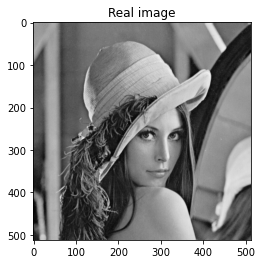

In [19]:
images_dir = os.path.abspath("../images")
image_real = np.array(Image.open(os.path.join(images_dir, "lena.pgm")))
plt.figure()
plt.title("Real image")
plt.imshow(image_real, cmap = "gray")

**Add noise to the image**

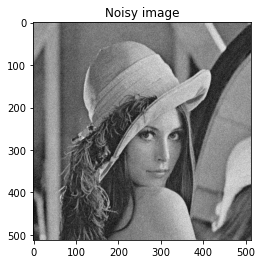

In [20]:
image_noisy = image_real + np.random.uniform(high = 50, size = image_real.shape)
plt.figure()
plt.title("Noisy image")
plt.imshow(image_noisy, cmap = "gray")

**Run the Gradient Descent**

In [55]:
# Define the gradient descent parameters
callback_params = {
    "noise": image_noisy,
    "coefficients": np.ones_like(image_noisy),    # --> CHANGE THIS AND COMPARE
    "beta":.5                                # --> CHANGE THIS AND COMPARE
}
step_size = .01                                   # --> CHANGE THIS AND COMPARE
max_iterations = 200                          # --> CHANGE THIS AND COMPARE
tolerance = .01                                  # --> CHANGE THIS AND COMPARE

# Run the gradient descent
image_gd = gradient_descent(callback = denoise_energy_gradient,
                            callback_params = callback_params, 
                            initial_condition = image_noisy, 
                            step_size = step_size, 
                            max_iterations = max_iterations,
                            tolerance = tolerance)

#rm fn

0 of 200 -> tolerance: 69067.77113905957
1 of 200 -> tolerance: 60914.83085682928
2 of 200 -> tolerance: 53883.155532975245
3 of 200 -> tolerance: 47807.34574839093
4 of 200 -> tolerance: 42547.29868884969
5 of 200 -> tolerance: 37984.271094969095
6 of 200 -> tolerance: 34017.560682841795
7 of 200 -> tolerance: 30561.707807780305
8 of 200 -> tolerance: 27544.134990704482
9 of 200 -> tolerance: 24903.15519570762
10 of 200 -> tolerance: 22586.290850049365
11 of 200 -> tolerance: 20548.85488227159
12 of 200 -> tolerance: 18752.752815187134
13 of 200 -> tolerance: 17165.471438171353
14 of 200 -> tolerance: 15759.225009200785
15 of 200 -> tolerance: 14510.234480059802
16 of 200 -> tolerance: 13398.119047979191
17 of 200 -> tolerance: 12405.382538647547
18 of 200 -> tolerance: 11516.979822503452
19 of 200 -> tolerance: 10719.950743575666
20 of 200 -> tolerance: 10003.11096755347
21 of 200 -> tolerance: 9356.790790119201
22 of 200 -> tolerance: 8772.614334310316
23 of 200 -> tolerance: 8243.3

197 of 200 -> tolerance: 181.5120818892361
198 of 200 -> tolerance: 178.94920793162333
199 of 200 -> tolerance: 176.42643302010728


**Show the results**

Text(0.5, 1.0, 'Gradient Descent image')

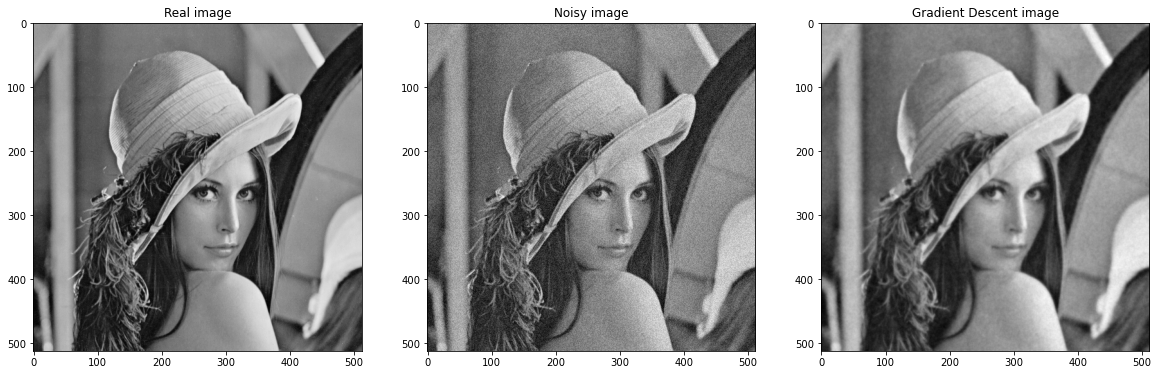

In [56]:
# Show the different images
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 12))
ax1.imshow(image_real, cmap = "gray")
ax1.set_title("Real image")
ax2.imshow(image_noisy, cmap = "gray")
ax2.set_title("Noisy image")
ax3.imshow(image_gd, cmap = "gray")
ax3.set_title("Gradient Descent image")

You can observe the real image, the noisy and the denoised one. Effectively as the function was defined (to minimze gradient and error of each pixel) we obtained a very similar image to the original one, and smoother than the noisy image. Also there are some drawbacks of this methoids, commented below.

Text(0.5, 1.0, 'Absolute error: real image vs denoised')

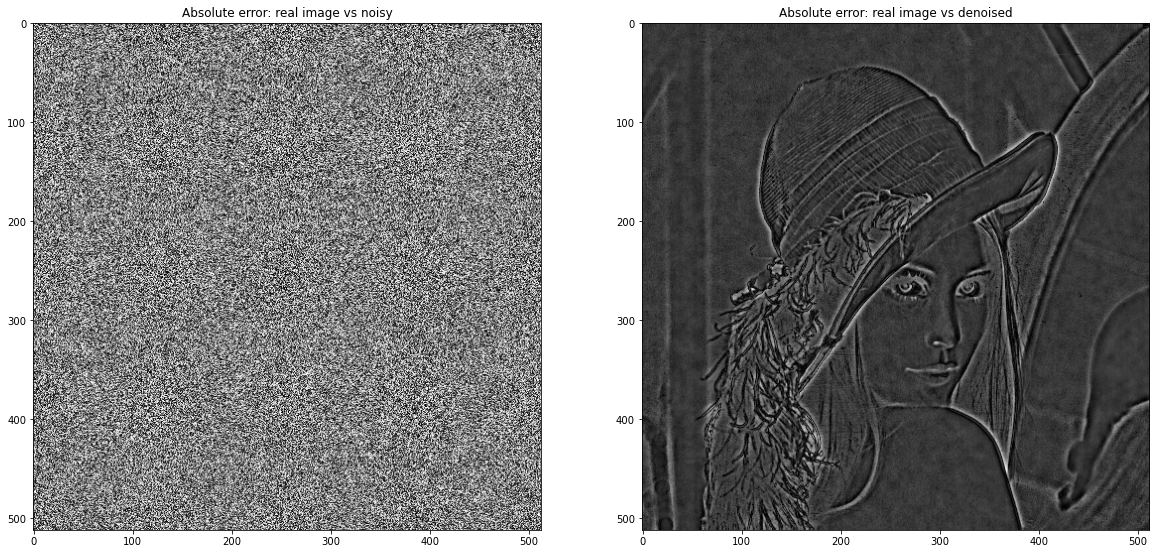

In [203]:
# Show the absolute error among images
noise = abs(image_real - image_noisy)
denoised = abs(image_gd - image_real)

# Plot
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 12))
ax1.imshow(noise, cmap = "gray")
ax1.set_title("Absolute error: real image vs noisy")
ax2.imshow(denoised, cmap = "gray")
ax2.set_title("Absolute error: real image vs denoised")

Text(0.5, 1.0, 'method noise')

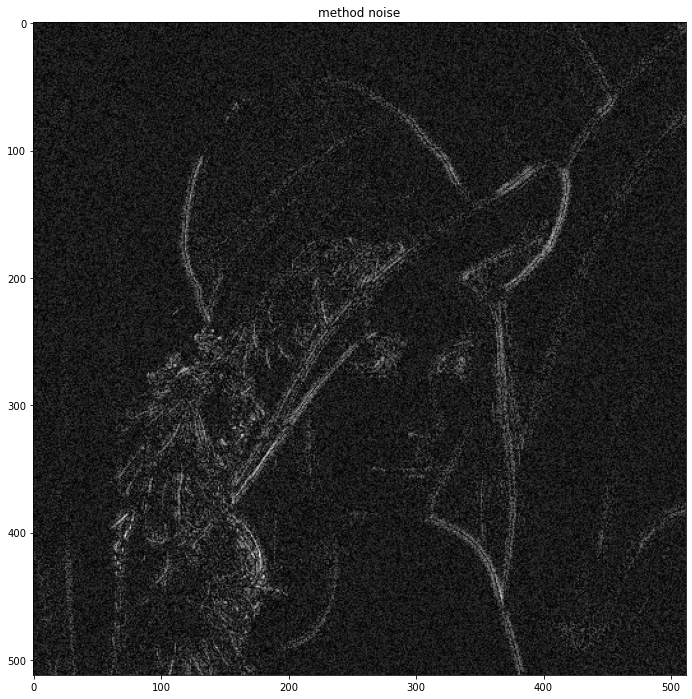

In [204]:
plt.figure(figsize = (20, 12))
plt.imshow(abs(image_gd - image_noisy), cmap = "gray")
plt.title('method noise')

The error of the noisy image follows a normal distribution, while the error of the denoised image has a well performance along a surface, but when it encounters an edge the error increase a lot, this is why you can see figure of the woman in the plot of it's error.

Q1 and Q3 where about completing code.

#### 3. Run the code blocks for denoise_main with different parameters (for instance, changing the maximum number of iterations, c, B,etc. Can you explain what you observe? What are the effects of changing c? Try to find the parameters gives you a smaller Mean Square Error. You can use the Python function mse.

Step_size: if you increase it to much the algorithm will stop before it's max iterations and you will get an error but if you use a very low step the denoised phot will be almost equal to the noised one.

Max_iterations: a low number wouldn't let the algorithm to do many changes so the photos will be very similar(noised and denoised). If you increase them, the smoothness and changes of the photo will be much clearer, but since each time we are getting closer but at lower pace, you can see the most changes in the first iterations, so you don't need to waste all the computations until an exact convergence.

Tolerance: in this case the effects are the same as in the prevoius exercise (high tolerance limit, the algorithm finishes before) but you can see that the values computed at each iteration are very high (with 200 iterations: 1K) therefore you should take this into account when defining a tolerance level, but since we are getting the most changes in a few hundreds of iterations, I don't think that the algorithm will get to it's tolerance limit unless you define it very high or with much more iterations.

Beta: this parameter defines how data "fidelity" you. A very high beta will let the photo denoised equal to the noised one since in this way the loosing of information is minimized, and a Beta of 0 will return avery smooth photo without taking into account any information losses. Furthermore, if you play with negative values, the image will begin to lose colors and "dropping out" information to minimize the fenergy function.

C: it is like a coefficient for the smoothness, for example if you let all ones it will try to minimize the gradient of each pixel*1, but if you set it to ...zeros_like... all the coefficients will be 0 and the algorithm won't try to smooth anything, giving a denoised photo equal to the noised. This coefficients can be useful for more complex algortihms, for example I think that if you set a lower coeffiecient for the borders of things, we could improve the error that we obtained when trying to smooth the whole image with the same coefficients. 



**Conclusions**


In this lab we explored the theoretical concepts behind the gradient descent descent algorithm and applied them to an R3 function studying it's behaviour and  dependency on some of the input parameters, and then we saw an application of this method to denoise images which gave "simple" results, but is the basis to apply some modifications and be able to develop more complex methods and obtain better resulst.